### We show that the log Norm ~ Power Law exponent  of a weight matrix

Create a random $\mathbf{W}$  heavy tailed matrix for various $\mu\in[0.5,4]$

$$Pr(W_{i,j})\sim x^{-(\mu+1)}$$

which is $(N\times M)$, where $M < N$

Compute the Frobenius norm of  $\mathbf{W}$ squared

$$\Vert\mathbf{W}\Vert_{F}^{2}=\sum_{i,j}^{N,M}W_{i,j}^{2}$$

which is the Trace of the correlation 
$$=Tr(\mathbf{W}^{T}\mathbf{W})$$

So let us the correlation matrix

$$\mathbf{X}=\mathbf{W}^{T}\mathbf{W}$$

and compute the eigenvalues $\lambda_{i}$

$$\mathbf{X}\mathbf{v}_{i}=\lambda_{i}\mathbf{v}_{i}$$

and note that the Trace is invariant to a change of basis

$$Tr(\mathbf{X})=\sum_{i}^{M}\lambda_{i}$$

Compute the Empirical Spectral Densityt (ESD) $\rho(\lambda)$ of $\mathbf{X}$...(i.e. make a histogram and fit to a continuous density)

Random Matrix Theory (RMT) tells us that as long as $\mu<4$, we can reasonably fit the ESD  to power law  

$$\rho(\lambda)\sim\lambda^{-\alpha}$$

and that this will be a pretrty good approximation for the finite range $\lambda\in[\lambda_{min},\lambda_{max}]$

We can now compute the Frobenius norm $\Vert\mathbf{W}\Vert_{F}^{2}$ as an integral over this density

$$\Vert\mathbf{W}\Vert_{F}^{2}=\int_{\lambda_{min}}^{\lambda^{max}}\lambda\rho(\lambda)d\lambda$$


We can easily work this integral out.  

$$=\int_{\lambda_{min}}^{\lambda^{max}}\lambda^{1-\alpha}d\lambda$$

$$=\left[\dfrac{\lambda^{\alpha}}{\alpha}\right]_{\lambda_{min}}^{\lambda^{max}}$$

We can approximate $\lambda_{min}\sim 0$ for most systems, giving

$$\approx\dfrac{\lambda_{max}^{\alpha}}{\alpha}$$


We now take the log of both sides

$$\log\Vert\mathbf{W}\Vert_{F}^{2}=2\log\Vert\mathbf{W}\Vert_{F}=\log\left[\dfrac{\lambda^{\alpha}}{\alpha}\right]_{\lambda_{min}}^{\lambda^{max}}$$


$$log\Vert\mathbf{W}\Vert_{F}^{2}=\left[\dfrac{\lambda^{\alpha}}{\alpha}\right]_{\lambda_{min}}^{\lambda^{max}}=\alpha\log\lambda_{max}-\log\alpha$$

If we ignore the second term $\log\alpha\sim\mathcal{O}(1)$, we get a very simple expression for log Norm


$$2\log\Vert\mathbf{W}\Vert_{F}\sim\alpha\log\lambda_{max}$$

Let's now see how good this is



In [15]:
import numpy as np
import powerlaw

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

see: https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.pareto.html

We should have

$\alpha\sim(1+\mu/2)$

### A crude test 

In [13]:
logNorms2, powerLawsW =  [], []
for mu in [0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5]:

    N, M = 9000, 3000
    W = np.random.pareto(a=mu,size=(N,M))
    normW = np.linalg.norm(W, ord='fro')#/np.sqrt(N)

    logNorm2 = 2.0*np.log10(normW)
    X=np.dot(W.T,W)/N
    evals = np.linalg.eigvals(X)

    l_max, l_min = np.max(evals), np.min(evals)
    fit =  powerlaw.Fit(evals)

    formula = fit.alpha*np.log10(l_max)
    ratio =  formula/logNorm2
    
    logNorms2.append(logNorm2)
    powerLawsW.append(formula)

    print("mu= {} 1+mu/2 = {}, alpha= {:2f} logNorm2= {:2f}  formula = {:2f} ratio = {:2f}"
          .format(mu,(1+mu/2),fit.alpha, logNorm2, formula, ratio ))


Calculating best minimal value for power law fit
/Users/charleshmartin/anaconda3/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


mu= 0.5 1+mu/2 = 1.25, alpha= 1.218266 logNorm2= 31.590356  formula = 33.664815 ratio = 1.065668


Calculating best minimal value for power law fit


mu= 0.75 1+mu/2 = 1.375, alpha= 1.352593 logNorm2= 18.571841  formula = 19.545594 ratio = 1.052432


Calculating best minimal value for power law fit


mu= 1.0 1+mu/2 = 1.5, alpha= 1.507772 logNorm2= 14.858720  formula = 15.665360 ratio = 1.054287


Calculating best minimal value for power law fit


mu= 1.25 1+mu/2 = 1.625, alpha= 1.611991 logNorm2= 12.128886  formula = 11.800924 ratio = 0.972960


Calculating best minimal value for power law fit


mu= 1.5 1+mu/2 = 1.75, alpha= 1.846792 logNorm2= 11.266202  formula = 13.401112 ratio = 1.189497


Calculating best minimal value for power law fit


mu= 1.75 1+mu/2 = 1.875, alpha= 2.106025 logNorm2= 9.356514  formula = 9.233825 ratio = 0.986887


Calculating best minimal value for power law fit


mu= 2.0 1+mu/2 = 2.0, alpha= 2.428771 logNorm2= 8.697983  formula = 9.652501 ratio = 1.109740


Calculating best minimal value for power law fit


mu= 2.25 1+mu/2 = 2.125, alpha= 2.793380 logNorm2= 8.269577  formula = 9.282850 ratio = 1.122530


Calculating best minimal value for power law fit


mu= 2.5 1+mu/2 = 2.25, alpha= 3.363207 logNorm2= 7.841370  formula = 10.512762 ratio = 1.340679


Calculating best minimal value for power law fit


mu= 2.75 1+mu/2 = 2.375, alpha= 4.007676 logNorm2= 7.607065  formula = 11.989522 ratio = 1.576104


Calculating best minimal value for power law fit


mu= 3.0 1+mu/2 = 2.5, alpha= 4.767992 logNorm2= 7.430866  formula = 13.713984 ratio = 1.845543


Calculating best minimal value for power law fit


mu= 3.25 1+mu/2 = 2.625, alpha= 5.879194 logNorm2= 7.281040  formula = 16.304950 ratio = 2.239371


Calculating best minimal value for power law fit


mu= 3.5 1+mu/2 = 2.75, alpha= 5.650166 logNorm2= 7.156541  formula = 15.151195 ratio = 2.117111


/Users/charleshmartin/anaconda3/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


### Not a bad match, at least for small $\alpha$ (large norm)

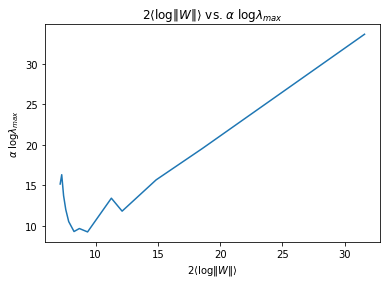

In [35]:
plt.plot(logNorms2, powerLawsW)
plt.title(r"$2\langle\log\Vert W\Vert\rangle$ vs. $\alpha\;\log\lambda_{max}$")
plt.ylabel(r"$\alpha\;\log\lambda_{max}$")

plt.xlabel(r"$2\langle\log\Vert W\Vert\rangle$")
plt.show()